<a href="https://colab.research.google.com/github/sarmi2325/Machine-Learning/blob/main/Titanic_Survivers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [170]:
import pandas as pd

In [171]:
from google.colab import files
uploads=files.upload()

Saving train.csv to train (4).csv


In [172]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [174]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [175]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


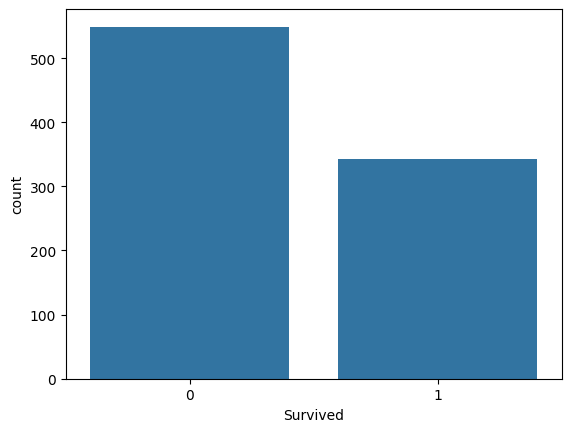

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Survived",data=df)
plt.show()

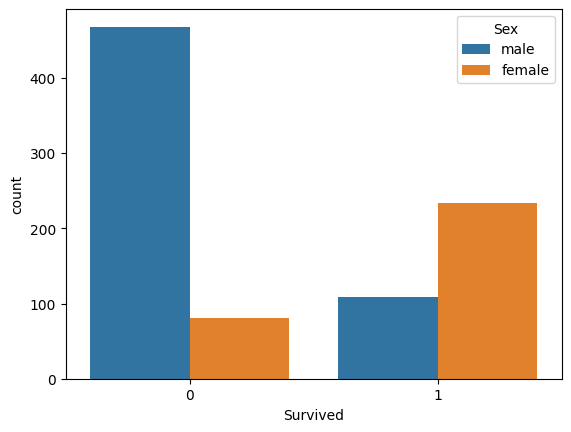

In [177]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

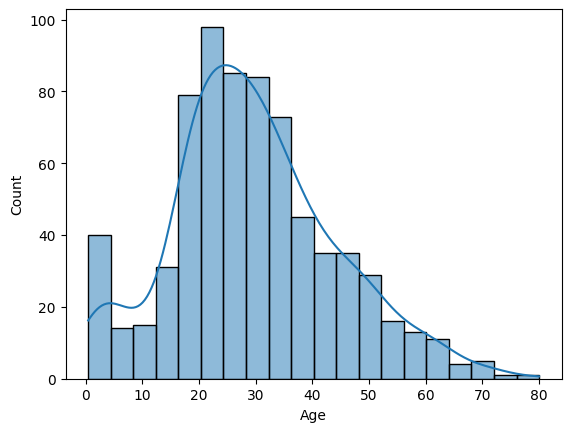

In [178]:
sns.histplot(df['Age'],kde=True)
plt.show()

In [179]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [180]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


In [181]:
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Mid-Age', 'Senior'])

# Encode the bins
df = pd.get_dummies(df, columns=['AgeBin'], drop_first=True)



In [182]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare or similar titles
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt','Col',\
 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# One-hot encode titles
df = pd.get_dummies(df, columns=['Title'], drop_first=True)


In [183]:
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid', 'High', 'VeryHigh'])

# Encode
df = pd.get_dummies(df, columns=['FareBin'], drop_first=True)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [184]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


<ipython-input-184-410e0d28aecf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-184-410e0d28aecf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [185]:
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)


In [186]:
df = pd.get_dummies(df, drop_first=True)


Random Forest Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



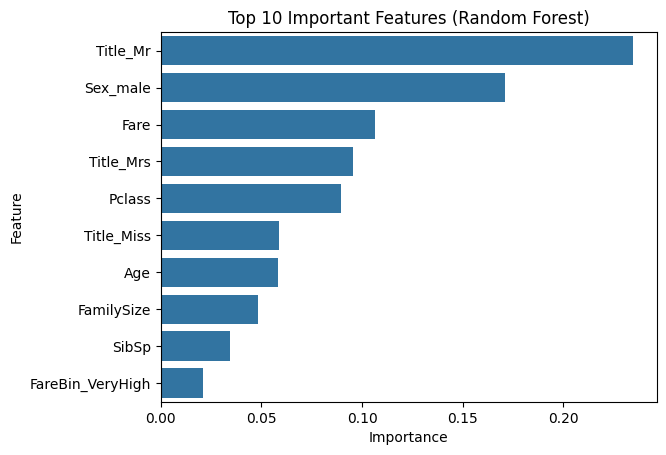

In [201]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Features and label
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a baseline Random Forest with default params
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
rf.fit(X_train, y_train)

# Train model

from sklearn.metrics import accuracy_score, classification_report

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Important Features (Random Forest)')
plt.show()





In [202]:
from google.colab import files
uploaded =files.upload()

Saving test.csv to test (7).csv


In [203]:
test_df=pd.read_csv('test.csv')

In [204]:
def preprocess_data(df):
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
    df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
    df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Mid-Age', 'Senior'])
    df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid', 'High', 'VeryHigh'])
    df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
    df = pd.get_dummies(df, drop_first=True)
    return df

test_processed = preprocess_data(test_df)


<ipython-input-204-316f2c341b89>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-204-316f2c341b89>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [205]:
test_processed.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,...,Title_Mr,Title_Mrs,Title_Rare,AgeBin_Teen,AgeBin_Adult,AgeBin_Mid-Age,AgeBin_Senior,FareBin_Mid,FareBin_High,FareBin_VeryHigh
0,3,34.5,0,0,7.8292,1,1,True,True,False,...,True,False,False,False,True,False,False,False,False,False
1,3,47.0,1,0,7.0000,2,0,False,False,True,...,False,True,False,False,False,True,False,False,False,False
2,2,62.0,0,0,9.6875,1,1,True,True,False,...,True,False,False,False,False,False,True,True,False,False
3,3,27.0,0,0,8.6625,1,1,True,False,True,...,True,False,False,False,True,False,False,True,False,False
4,3,22.0,1,1,12.2875,3,0,False,False,True,...,False,True,False,False,True,False,False,True,False,False


In [206]:
# Add missing columns
for col in X.columns:
    if col not in test_processed.columns:
        test_processed[col] = 0

# Reorder columns to match training set
test_processed = test_processed[X.columns]



In [207]:
predictions = rf.predict(test_processed)


In [208]:
submission = pd.read_csv('test.csv')[['PassengerId']]
submission['Survived'] = predictions
submission.to_csv('submission.csv', index=False)


In [209]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>